C:\Users\fahme\AppData\Local\Temp\ipykernel_25120\304132790.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2022['Formatted Price'] = df_2022['Price (in USD)'].apply(format_price)
C:\Users\fahme\AppData\Local\Temp\ipykernel_25120\304132790.py:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(df_2022['Formatted Price'])


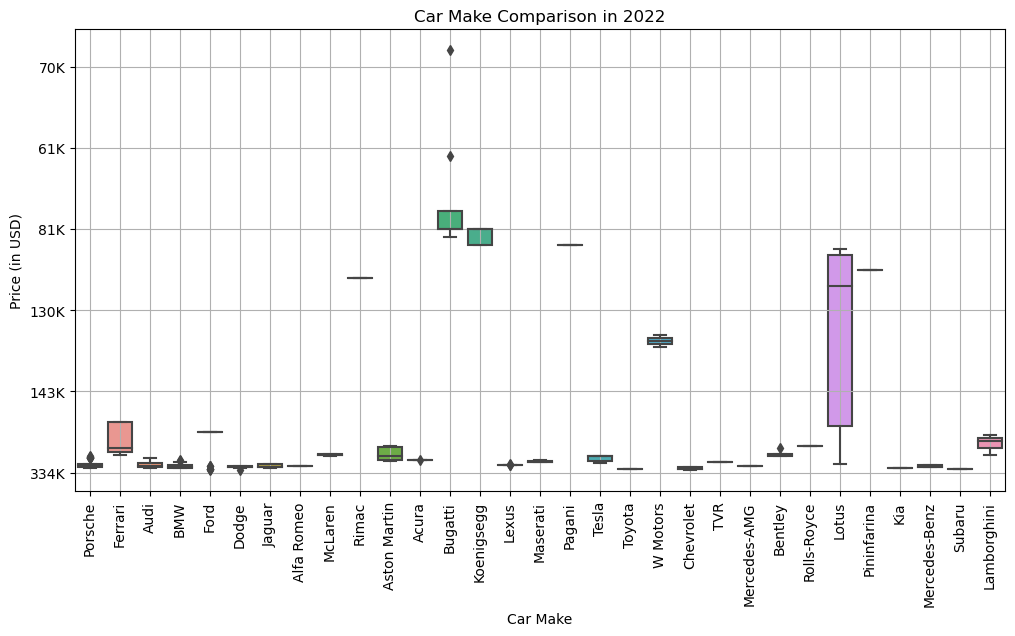

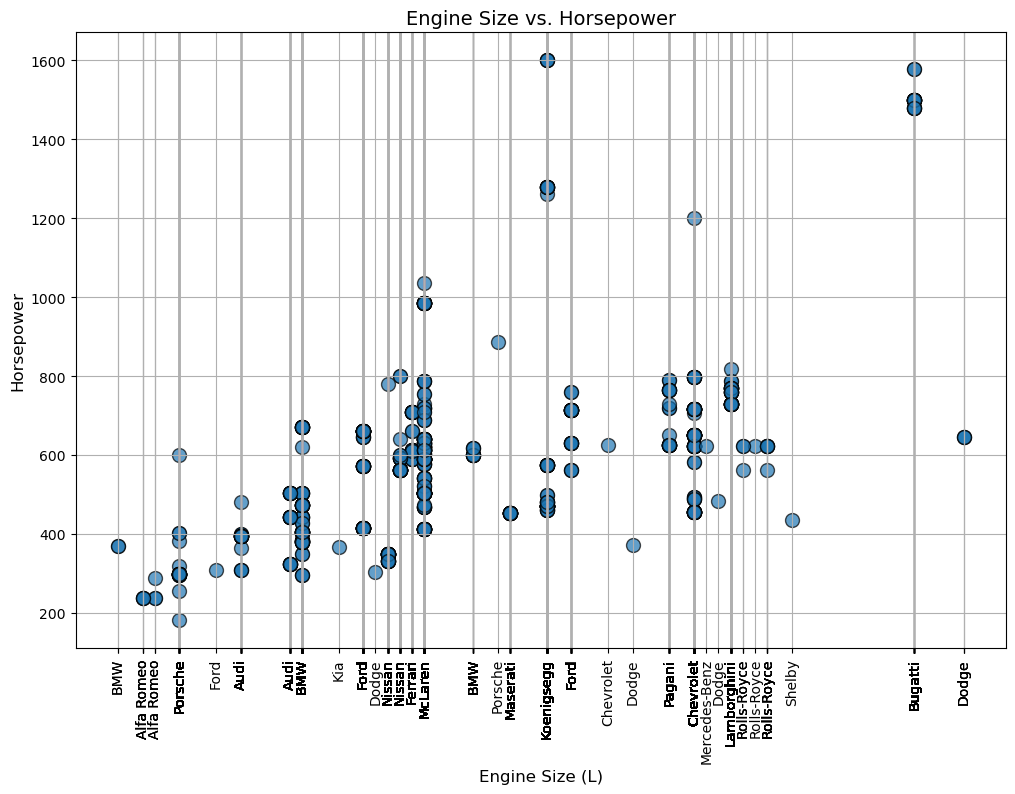

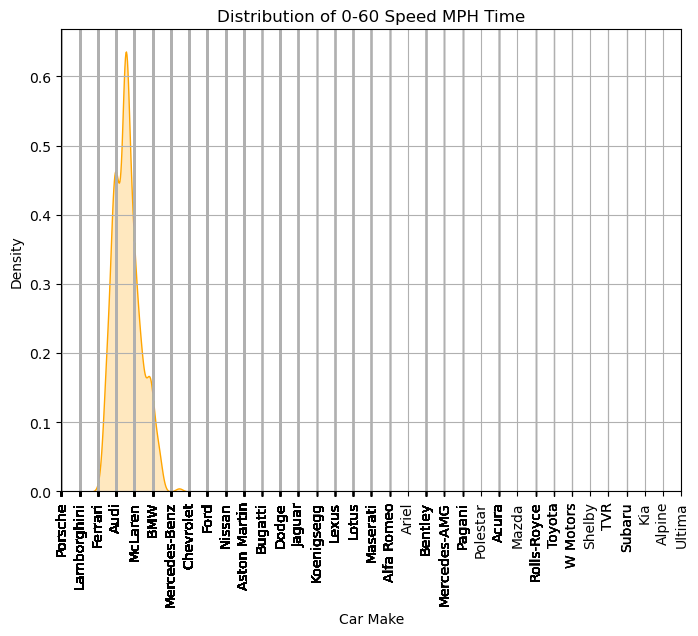

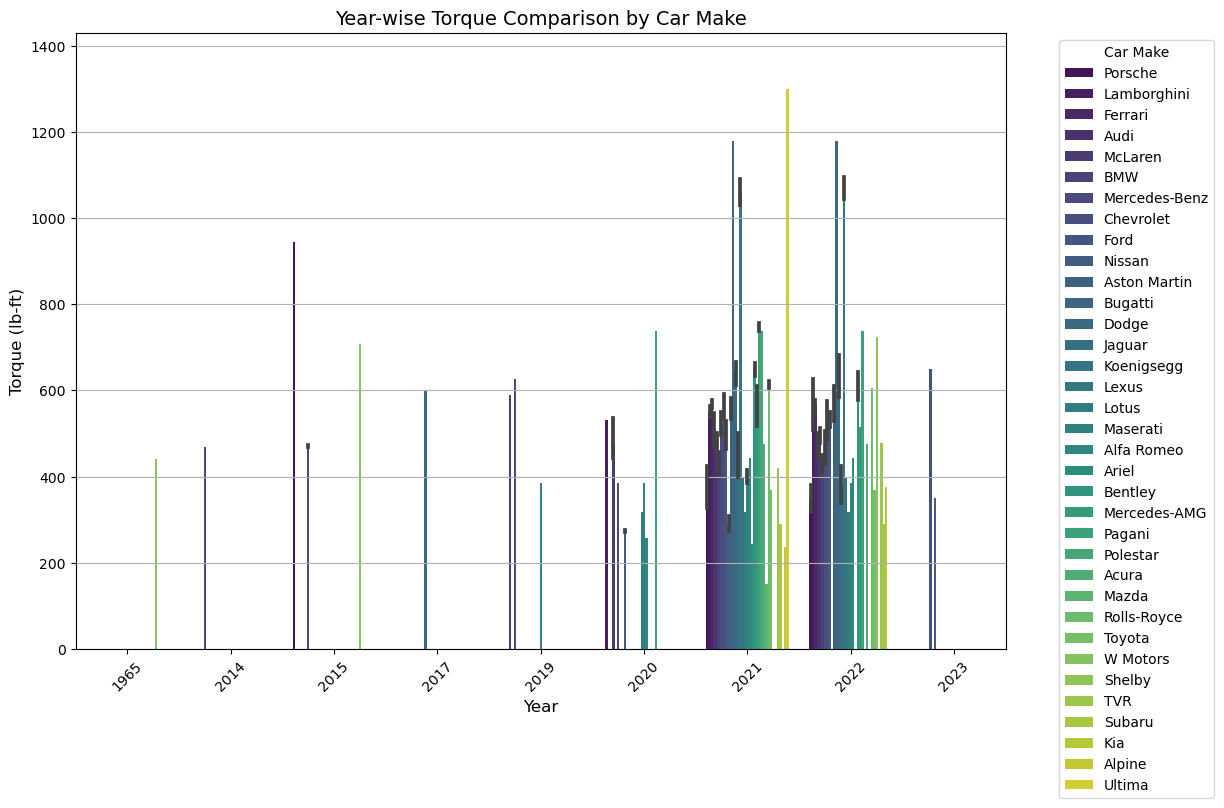

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def format_price(price):
    if price >= 1000000:
        return '{:.0f}M'.format(price / 1000000)
    elif price >= 1000:
        return '{:.0f}K'.format(price / 1000)
    else:
        return '{:.0f}'.format(price)

# Visualization 1: Distribution of Car Prices
    
file_path = 'Sport car price.csv'
df = pd.read_csv(file_path)
df['Price (in USD)'] = df['Price (in USD)'].replace(',', '', regex=True).astype(float)
#print(df.head())

df_2022 = df[df['Year'] == 2022]
df_2022['Formatted Price'] = df_2022['Price (in USD)'].apply(format_price)
#print(df_2022.head())

plt.figure(figsize=(12, 6))
sns.boxplot(x='Car Make', y='Price (in USD)', data=df_2022)
plt.xticks(rotation=90)
plt.xlabel('Car Make')
plt.ylabel('Price (in USD)')
plt.title('Car Make Comparison in 2022')
plt.gca().set_yticklabels(df_2022['Formatted Price'])
plt.grid(True)
#plt.savefig("22093522(1).png", dpi=300)
plt.show()


# Visualization 2: Engine Size Distribution per Car Make

df['Engine Size (L)'] = pd.to_numeric(df['Engine Size (L)'], errors='coerce')
#print(df.head())
df.dropna(subset=['Engine Size (L)'], inplace=True)
df['Horsepower'] = pd.to_numeric(df['Horsepower'], errors='coerce')
df.dropna(subset=['Horsepower'], inplace=True)
df.dropna(subset=['Engine Size (L)', 'Horsepower', 'Car Make'], inplace=True)
plt.figure(figsize=(12, 8))
plt.scatter(df['Engine Size (L)'], df['Horsepower'], marker='o', s=100, 
            edgecolors='black', alpha=0.7)
plt.xticks(df['Engine Size (L)'], df['Car Make'], rotation=90)
plt.xlabel('Engine Size (L)', fontsize=12)
plt.ylabel('Horsepower', fontsize=12)
plt.title('Engine Size vs. Horsepower', fontsize=14)
plt.grid(True)
#plt.savefig("22093522(2).png", dpi=300)
plt.show()


# Visualization 3: 0-60 MPH Time Distribution


df['0-60 MPH Time (seconds)'] = pd.to_numeric(df['0-60 MPH Time (seconds)'], 
                                              errors='coerce')
df.dropna(subset=['0-60 MPH Time (seconds)', 'Car Make'], inplace=True)
car_make_map = {car: i for i, car in enumerate(df['Car Make'].unique())}
df['Car Make Numeric'] = df['Car Make'].map(car_make_map)
plt.figure(figsize=(8, 6))
sns.kdeplot(df['0-60 MPH Time (seconds)'], fill=True, color='orange')
plt.xlabel('Car Make')
plt.ylabel('Density')
plt.title('Distribution of 0-60 Speed MPH Time')
plt.xticks(df['Car Make Numeric'], df['Car Make'], rotation=90)
plt.grid(True)
#plt.savefig("22093522(3).png", dpi=300)
plt.show()


# Visualization 4: Year-wise Torque Comparison by Car Make

df['Torque (lb-ft)'] = pd.to_numeric(df['Torque (lb-ft)'], errors='coerce')
plt.figure(figsize=(12, 8))
sns.barplot(x='Year', y='Torque (lb-ft)', hue='Car Make', data=df, 
            palette='viridis')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Torque (lb-ft)', fontsize=12)
plt.title('Year-wise Torque Comparison by Car Make', fontsize=14)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Car Make')
plt.xticks(rotation=45)
plt.grid(axis='y')
max_torque = df['Torque (lb-ft)'].dropna().max() * 1.1  
plt.ylim(0, max_torque)
#plt.savefig("22093522(4).png", dpi=300)
plt.show()


# Github link: https://github.com/Faraz291/DHV-infographics.git




